# Digit Classification using Dense Neural Network (DNN) - Version 2 
 - Using validation and test data 

## ==> Verify on Runtime tab if GPU is active on Runtime type

## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits dataset

The MNIST database of handwritten digits, available from this [page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 28x28 grayscale images of the 10 digits along a test set of 10,000 images. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


In [5]:
data = tf.keras.datasets.mnist

(tt_images, tt_labels), (val_images, val_labels) = data.load_data()

In [6]:
print(tt_images.shape)
print(tt_labels.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


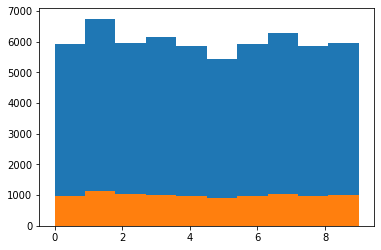

In [8]:
plt.hist(tt_labels);
plt.hist(val_labels);

In [9]:
test_images = tt_images[:10000]
test_labels = tt_labels[:10000]

In [10]:
training_images = tt_images[10000:]
training_labels = tt_labels[10000:]

In [11]:
print(training_images.shape)
print(training_labels.shape)

(50000, 28, 28)
(50000,)


In [12]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


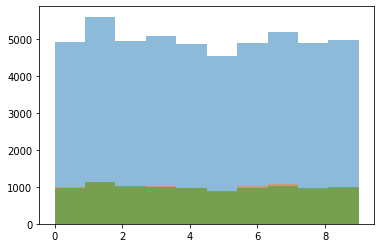

In [13]:
plt.hist(training_labels, alpha=0.5)
plt.hist(test_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5);

     Label of image 1000 is: 0


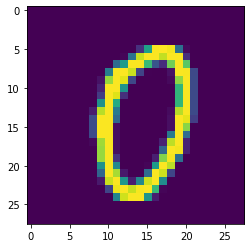

In [14]:
img = 1000
print("     Label of image {} is: {}".format(img, test_labels[img]))
plt.imshow(test_images[img]);

### Preprocessing Data 

**Normalizing Data**: 
We notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [15]:
training_images  = training_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Define and Compile Model

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [18]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(20, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    optimizer='adam', # uses default learning_rate=0.001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [21]:
from tensorflow.keras.optimizers import Adam, SGD

In [22]:
opt = Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Train the model

You could leave the training data with all samples, and alternativelly use: 
- `validation_split=0.1` instead of `validation_data=(val_images, val_labels)`.

In this case, TF will split the validation data by itself. 

In [27]:
history = model.fit(
    training_images, 
    training_labels, 
    epochs=20, 
    validation_data=(val_images, val_labels) 
    )

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8816 - val_loss: 0.2502 - val_accuracy: 0.9283
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9319 - val_loss: 0.2055 - val_accuracy: 0.9391
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1958 - accuracy: 0.9428 - val_loss: 0.1787 - val_accuracy: 0.9471
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1741 - accuracy: 0.9489 - val_loss: 0.1759 - val_accuracy: 0.9466
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1587 - accuracy: 0.9544 - val_loss: 0.1623 - val_accuracy: 0.9513
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.9566 - val_loss: 0.1632 - val_accuracy: 0.9523
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1376 - accuracy: 0.9599 - val_loss: 0.1514 - val_accuracy:

Inspecting the model

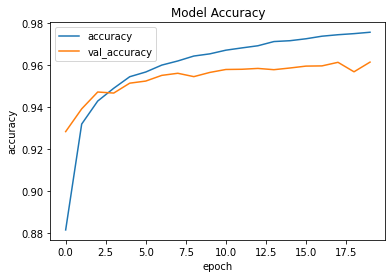

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

## Testing the trained model


In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1552 - accuracy: 0.9564


[0.15519589185714722, 0.9563999772071838]

**Accuracy**
- Train: 0.97; 
- Validation: 0.96 
- Test: 0.95

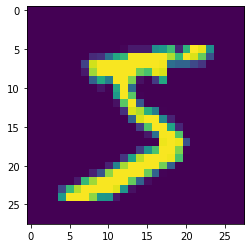

In [31]:
plt.imshow(test_images[0]);

In [32]:
print(test_labels[0])

5


In [34]:
predictions = model.predict(test_images)
print(predictions[0])

[5.6261435e-13 1.3585398e-11 1.5756122e-11 5.3147087e-04 6.3963793e-27
 9.9946851e-01 6.1152620e-19 6.1095039e-11 4.9576353e-13 5.6294535e-08]


In [35]:
# Returns the indices of the maximum values along an axis.
np.argmax(predictions[0])

5

In [36]:
predictions = np.argmax(predictions, axis=-1)
predictions.shape

(10000,)

In [37]:
predictions[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1001
           1       0.97      0.98      0.97      1127
           2       0.95      0.95      0.95       991
           3       0.93      0.94      0.94      1032
           4       0.95      0.96      0.96       980
           5       0.92      0.95      0.94       863
           6       0.96      0.98      0.97      1014
           7       0.98      0.97      0.97      1070
           8       0.95      0.90      0.93       944
           9       0.95      0.95      0.95       978

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [39]:
confusion_matrix(test_labels,predictions)

array([[ 978,    0,    2,    3,    2,    5,    7,    0,    3,    1],
       [   0, 1100,    7,    3,    3,    1,    0,    1,   10,    2],
       [   7,    7,  938,   15,    9,    1,    2,    3,    8,    1],
       [   2,    1,    8,  974,    0,   31,    0,    7,    6,    3],
       [   2,    4,    4,    1,  941,    3,    6,    1,    0,   18],
       [   1,    3,    2,   16,    4,  823,    5,    0,    7,    2],
       [   5,    1,    1,    0,    6,    4,  994,    0,    3,    0],
       [   0,    1,    7,    5,    4,    2,    0, 1037,    1,   13],
       [   4,   12,   13,   15,    3,   18,   19,    1,  853,    6],
       [   2,    2,    1,   13,   15,    4,    0,   10,    5,  926]])

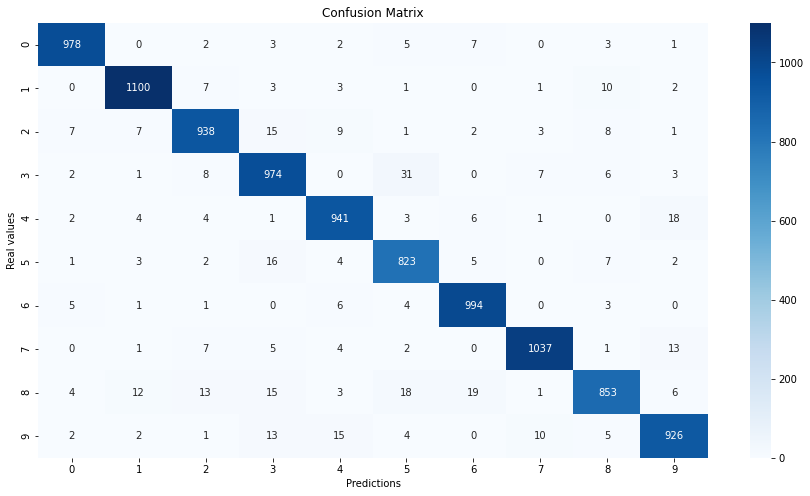

In [40]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap="Blues", annot=True, fmt='g');
plt.title('Confusion Matrix')
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()

In [41]:
model.save('MNIST_v2_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 